# 1-setup and load data

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import glob

In [2]:
os.path.join('data','happy')

'data\\happy'

In [3]:
## removing dodgy images
data_pat='data'
img_ext=['jpg','png']

In [4]:
os.listdir(data_pat)

['happy', 'sad']

In [5]:
data_dir = "data"
  # add there all your images file extensions
n=0
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]


for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        img_path=os.path.join(data_dir,image_class,image)
        img_type = imghdr.what(img_path)
        if img_type is None:
            continue
        elif img_type not in img_type_accepted_by_tf:
            continue
        else:
            n+=1
print(n)


417


# 1-3-load data

In [6]:
directory = os.path.abspath("./data")
new_directory = os.path.abspath("./new")


for folder_name in ('happy','sad'):
    folder_path = os.path.join(directory, folder_name)
    new_folder_path = os.path.join(new_directory, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        im = Image.open(fpath)
        rgb_im = im.convert("RGB")
        new_fpath = os.path.join(new_folder_path, fname).replace('.jpeg', '.jpg')
        rgb_im.save(new_fpath)

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
img_dataset=image_dataset_from_directory('new')

Found 433 files belonging to 2 classes.


In [8]:
data=tf.keras.utils.image_dataset_from_directory('new')

Found 433 files belonging to 2 classes.


In [9]:
#see sample image
data_iter=data.as_numpy_iterator()
bat=data_iter.next()

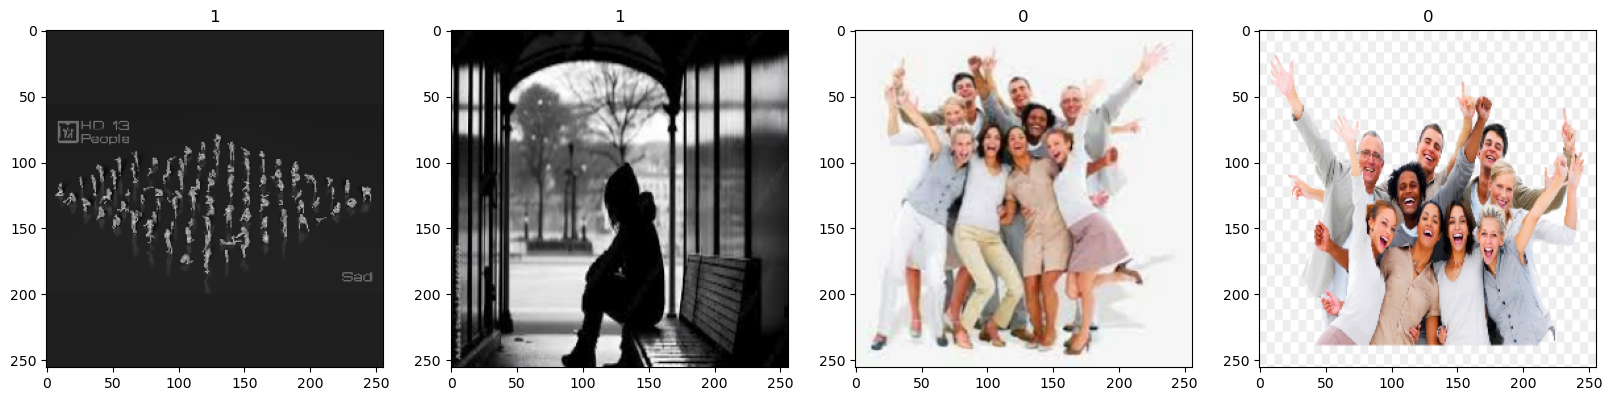

In [10]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for id,img in enumerate(bat[0][:4]):
    ax[id].imshow(img.astype(int))
    ax[id].title.set_text(bat[1][id])

In [11]:
#scaling data
data=data.map(lambda x,y:(x/255,y))

In [12]:
#split data:
train_size=int(len(data)*.7)
validation_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [13]:
train=data.take(train_size)
val=data.skip(train_size).take(validation_size)
test=data.skip(train_size+validation_size).take(test_size)

# 3-deep model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [15]:
import tensorflow as tf
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [17]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
#training model
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 78s 7s/step - loss: 0.8290 - accuracy: 0.5729 - val_loss: 0.6308 - val_accuracy: 0.6875
Epoch 2/20
9/9 [==============================] - 56s 6s/step - loss: 0.6453 - accuracy: 0.6667 - val_loss: 0.5217 - val_accuracy: 0.7917
Epoch 3/20
9/9 [==============================] - 52s 5s/step - loss: 0.5321 - accuracy: 0.7743 - val_loss: 0.5659 - val_accuracy: 0.7500
Epoch 4/20
9/9 [==============================] - 53s 5s/step - loss: 0.4879 - accuracy: 0.7604 - val_loss: 0.3243 - val_accuracy: 0.8854
Epoch 5/20
9/9 [==============================] - 51s 5s/step - loss: 0.3796 - accuracy: 0.8576 - val_loss: 0.4581 - val_accuracy: 0.7708
Epoch 6/20
9/9 [==============================] - 52s 5s/step - loss: 0.3046 - accuracy: 0.8715 - val_loss: 0.2533 - val_accuracy: 0.9062
Epoch 7/20
9/9 [==============================] - 53s 5s/step - loss: 0.2198 - accuracy: 0.9132 - val_loss: 0.1223 - val_accuracy: 0.9583
Epoch 8/20
9/9 [==================

# Plot performance

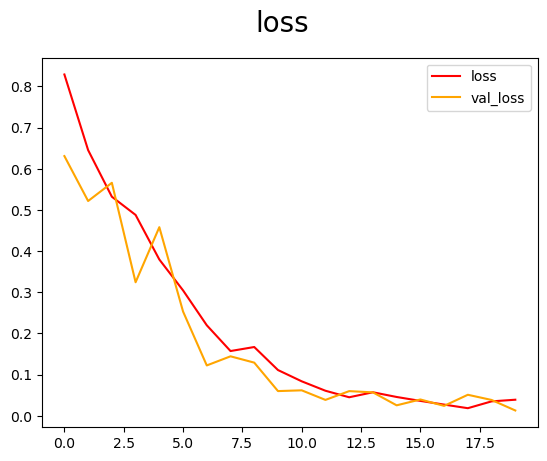

In [19]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend()
plt.show()

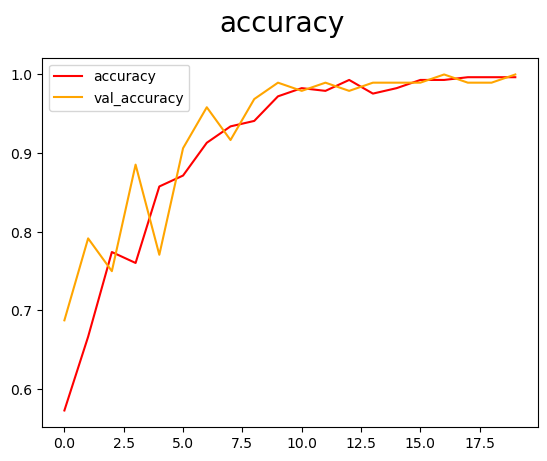

In [20]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend()
plt.show()

# 4-Evaluate result

In [21]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [22]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [23]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred=model.predict(X)
    pre.update_state(y,y_pred)
    re.update_state(y,y_pred)
    acc.update_state(y,y_pred)

1/1 [==============================] - 1s 734ms/step


In [24]:
print(f'pre:{pre.result().numpy()},recall:{re.result().numpy()},acc:{acc.result().numpy()}')

pre:1.0,recall:1.0,acc:1.0


# 5-Testing

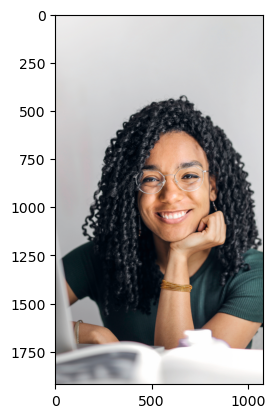

In [31]:
img2=cv2.imread('happytest.png')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

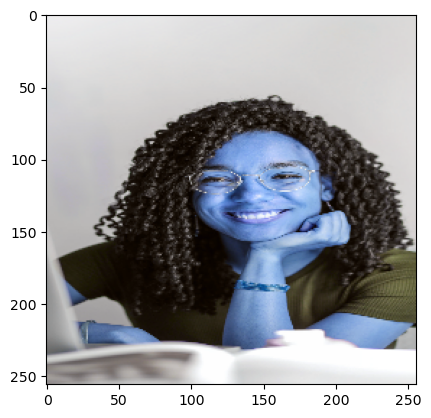

In [32]:
resize2=tf.image.resize(img2,(256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [36]:
y_pred1=model.predict(np.expand_dims(resize2/255,0))

1/1 [==============================] - 0s 51ms/step


In [37]:
if y_pred1>0.5:
    print('sad')
else:
    print('happy')

happy


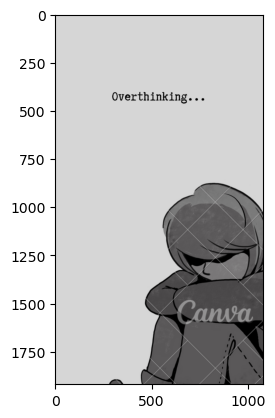

In [39]:
img1=cv2.imread('sadtest.png')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

plt.show()

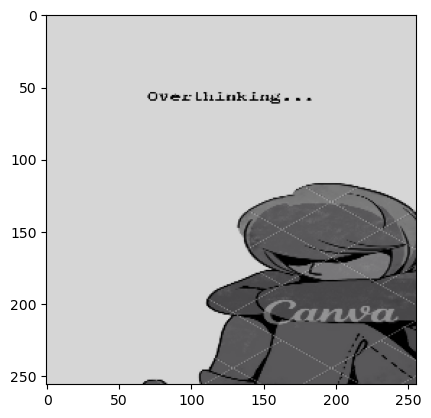

In [40]:
resize=tf.image.resize(img1,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        ...,
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ]],

       [[214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        ...,
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ]],

       [[214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        ...,
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ],
        [214.      , 214.      , 214.      ]],

       ...,

       [[214.      , 214.      , 214.      ],
        [214.

In [47]:
y_pred2=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 51ms/step


In [49]:
if y_pred2>0.5:
    print('sad')
else:
    print('happy')

sad
